In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler 

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
data.shape

(200, 5)

In [10]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

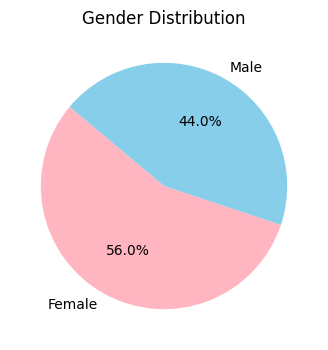

In [11]:
gender_counts = data['Gender'].value_counts() 
plt.figure(figsize=(4, 4)) 
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightpink', 'skyblue']) 
plt.title('Gender Distribution') 
plt.show()

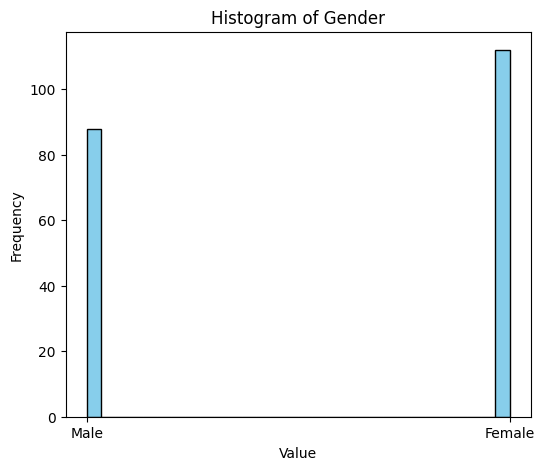

In [12]:
plt.figure(figsize=(6, 5))
plt.hist(data['Gender'], bins=30, edgecolor='black', color='skyblue') 
plt.xlabel('Value') 
plt.ylabel('Frequency') 
plt.title('Histogram of Gender') 
plt.show()

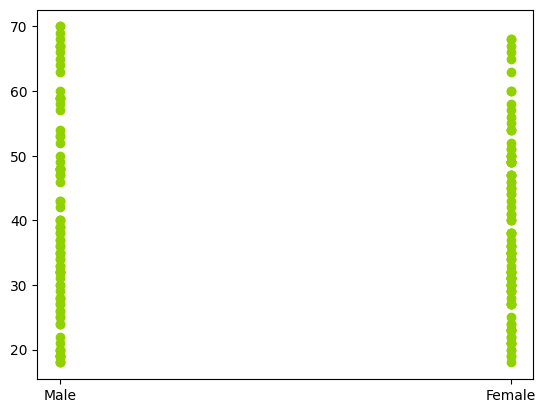

In [13]:
plt.scatter(data["Gender"], data["Age"],color = '#90d100')

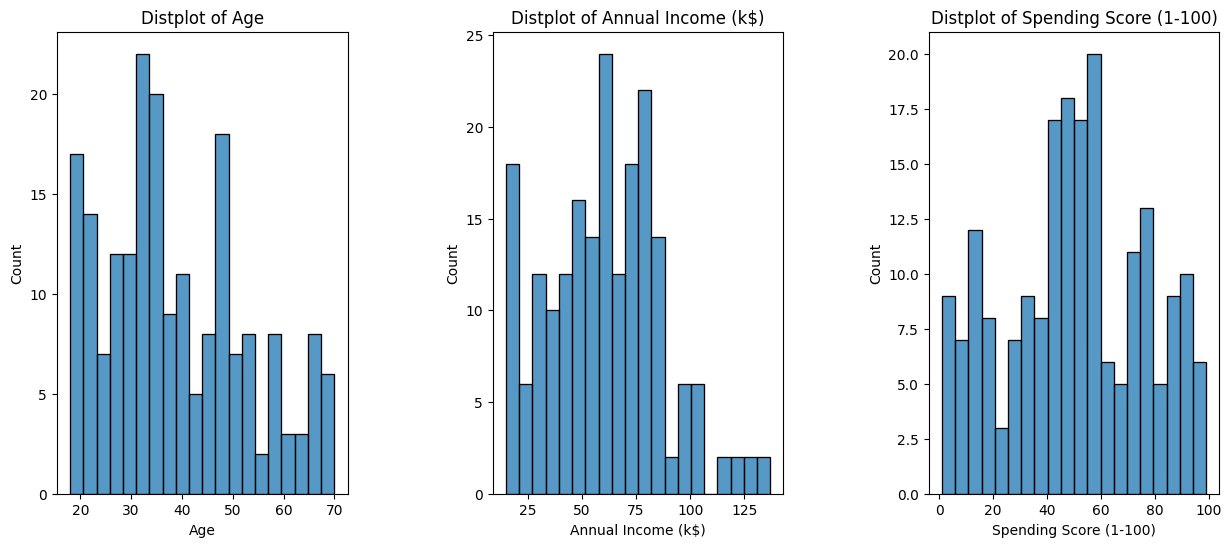

In [14]:
plt.figure(figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show();

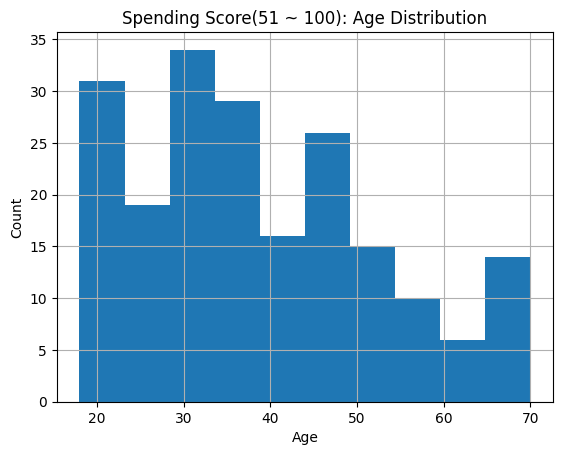

In [15]:
data['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score(51 ~ 100): Age Distribution');

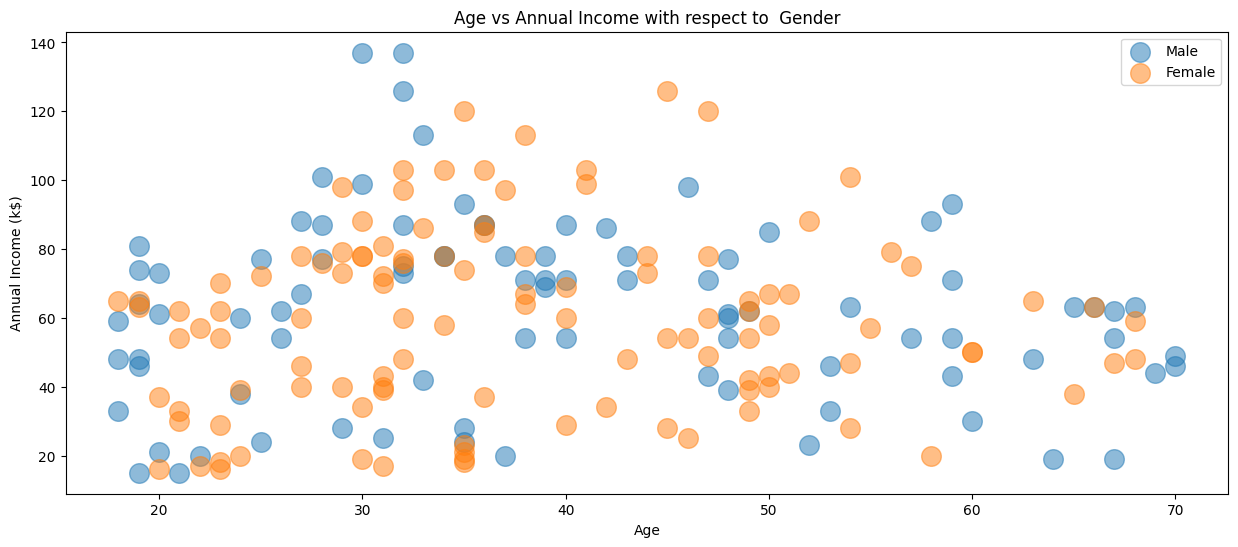

In [16]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = data[data['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income with respect to  Gender')
plt.legend()
plt.show()

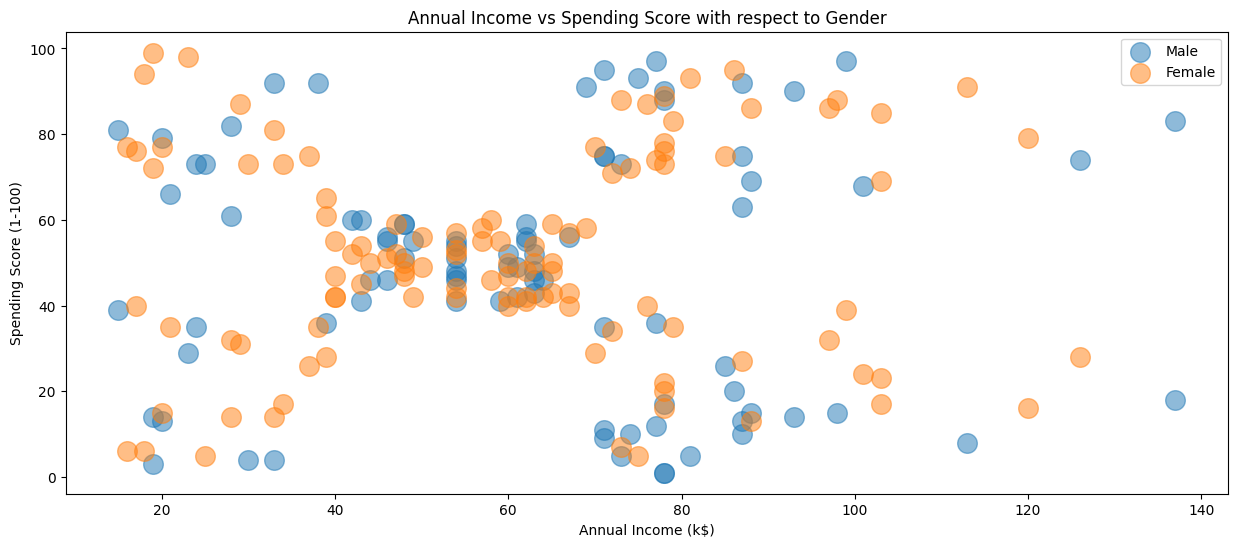

In [17]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = data[data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score with respect to Gender')
plt.legend()
plt.show()

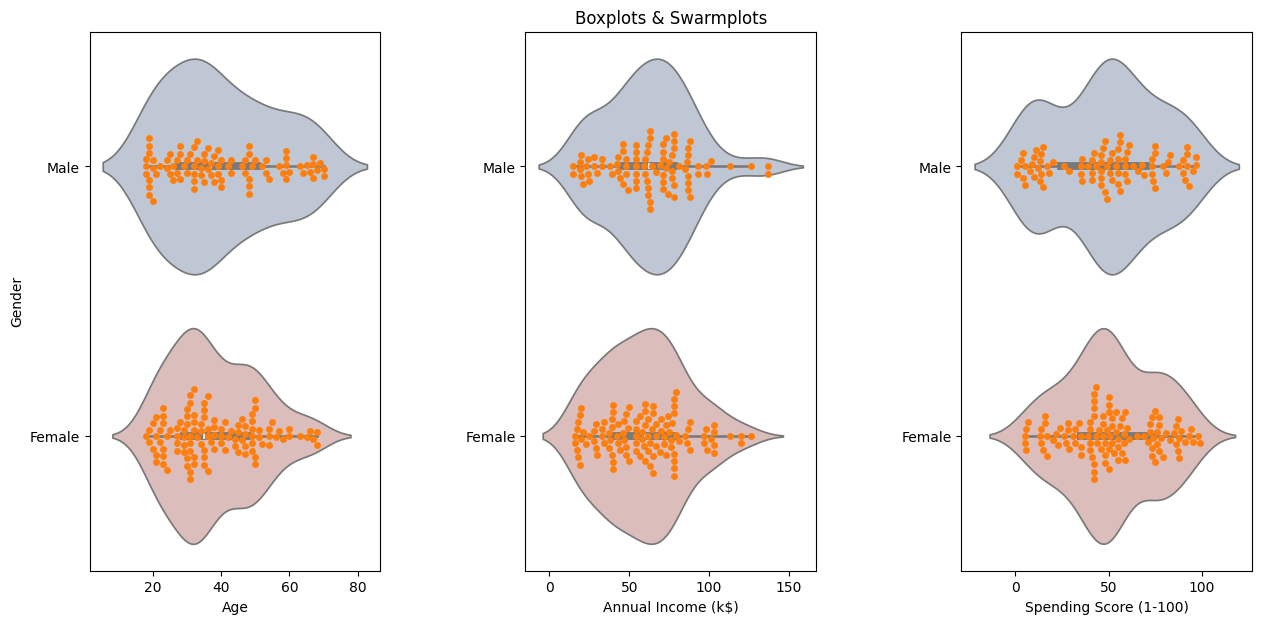

In [18]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = data , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = data)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

In [19]:
X = data.iloc[: , [3,4]]
print(f"X Shape {X.shape}")
X.head()

X Shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
n_clusters = range(2 , 13)
inertia_errors = []
silhouette_scores = []
# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters= k , random_state= 42)
    #TRAIN MODEL
    model.fit(X)
    #CALCULATE INERTIA
    inertia_errors.append(model.inertia_)
    #CALCULATE SILHOUETTE SCORE
    silhouette_scores.append(silhouette_score(X , model.labels_))
print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [183653.3289473684, 106348.37306211119, 73880.64496247195]

Silhouette Scores: [np.float64(0.39564531743995546), np.float64(0.46761358158775435), np.float64(0.4937945814354117)]


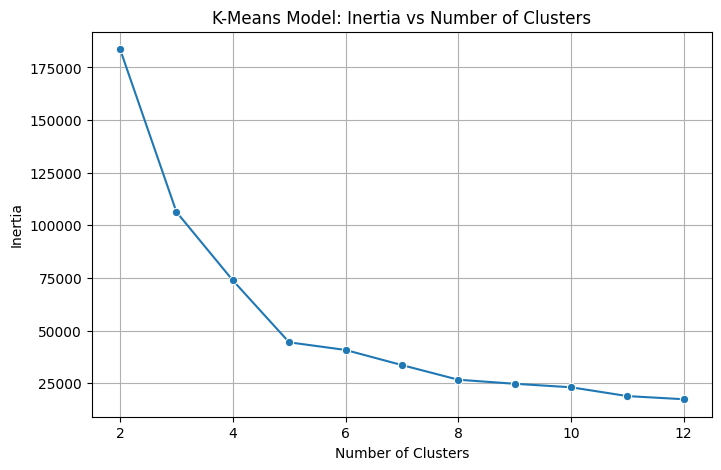

In [22]:
plt.figure(figsize=(8, 5)) 
sns.lineplot(x=range(2 , 13), y=inertia_errors, marker='o') 
plt.xlabel('Number of Clusters') 
plt.ylabel('Inertia') 
plt.title('K-Means Model: Inertia vs Number of Clusters') 
plt.grid(True) 
plt.show()

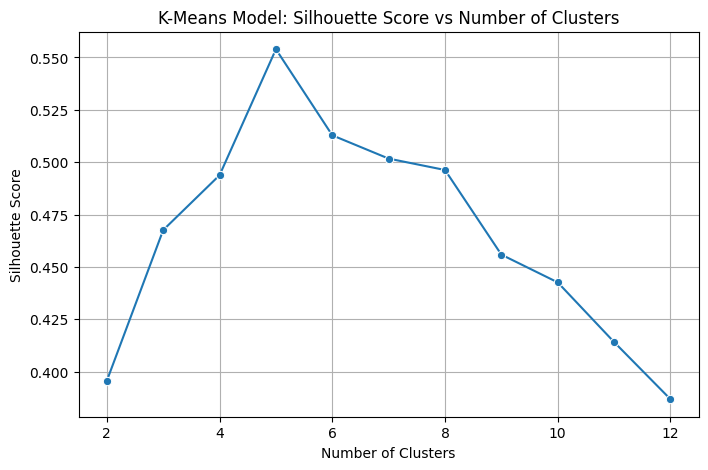

In [23]:
plt.figure(figsize=(8, 5)) 
sns.lineplot(x=n_clusters, y=silhouette_scores, marker='o') 
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette Score') 
plt.title('K-Means Model: Silhouette Score vs Number of Clusters') 
plt.grid(True)
plt.show()

In [24]:
final_model = KMeans(n_clusters=5 , random_state= 42)
final_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [25]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])

[4 2 4 2 4]


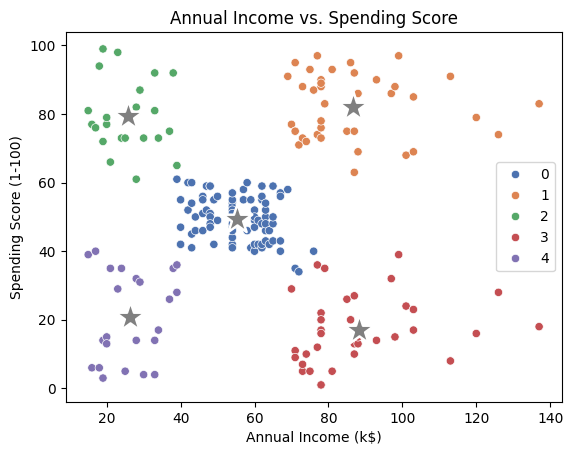

In [26]:
sns.scatterplot(x=data['Annual Income (k$)'] , y= data['Spending Score (1-100)'] ,
               hue=labels,
               palette='deep')
sns.scatterplot(
    x= centroids[:,0],
    y= centroids[: ,1],
    color= 'gray',
    marker= '*',
    s= 500
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs. Spending Score");

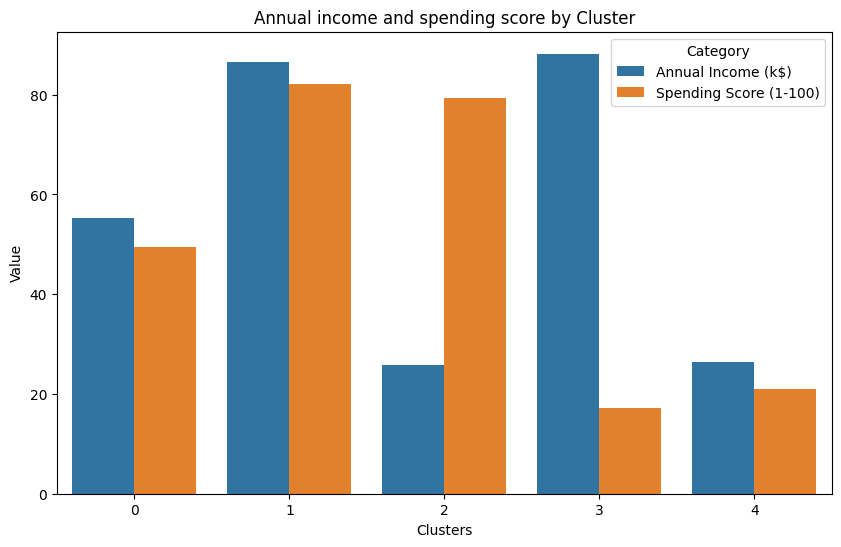

In [27]:
xgb= X.groupby(final_model.labels_).mean()
xgb_reset = xgb.reset_index() 
xgb_melted = xgb_reset.melt(id_vars='index', var_name='Category', value_name='Value') 
plt.figure(figsize=(10, 6)) 
sns.barplot(x='index', y='Value', hue='Category', data=xgb_melted) 
plt.xlabel('Clusters') 
plt.ylabel('Value')
plt.title('Annual income and spending score by Cluster') 
plt.legend(title='Category') 
plt.show()